# Exercise 7  - Odin Kvarving

# Tasks

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import array as arr

mushrooms = pd.read_csv("data/agaricus-lepiota.data")

mushrooms.head()


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [67]:
from sklearn.preprocessing import LabelEncoder

# Transfrom binary categories to either 0 or 1:
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    if len(mushrooms[col].value_counts())==2:
        
        mushrooms[col]=labelencoder.fit_transform(mushrooms[col])
    
mushrooms.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,w,w,p,w,o,e,n,a,g


In [68]:
mushrooms['edibility'].unique()

mushrooms = pd.get_dummies(mushrooms)

# X is all categories except 'edibility' 
X = mushrooms.drop(['edibility'], axis=1)
X.head()


,bruises?,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
# Y (target) is the 'edibility' category
Y = mushrooms['edibility']
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: edibility, dtype: int32

In [70]:
X.describe()

,bruises?,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.415559,0.974151,0.161497,0.309207,0.567208,0.055638,0.000492,0.387986,0.101920,0.003939,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.492848,0.158695,0.368011,0.462195,0.495493,0.229235,0.022185,0.487321,0.302562,0.062641,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import KMeans

result = []
for i in range(2, 31):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    result.append(metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))

print("Metrics-silhouette-score per n_clusters: ")
for i in result:
    print(i, end = ' ')



Metrics-silhouette-score per n_clusters: 
0.1578442723522316 0.20502879374121666 0.21043413105310402 0.2335300576808903 0.24850380830199437 0.26123737410383946 0.26593385280920556 0.21020429886005826 0.21734965620628235 0.2139601038401479 0.1827870077660224 0.1904156263979794 0.18705052923333587 0.2054356033190373 0.15547673098019393 0.1535512195005603 0.1566296055069397 0.14071734294845276 0.1549962635343138 0.16266303349829 0.14060944341822468 0.14477781926914188 0.17001400065621158 0.1478890958828477 0.15228944686540596 0.14968471302289516 0.14902427297007295 0.14738631557957932 0.1375363381515927 

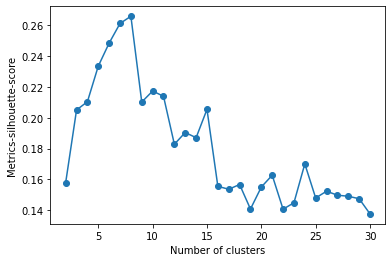

In [94]:
plt.figure()
plt.plot(range(2,31), result, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Metrics-silhouette-score")
plt.show()

In [93]:
index = np.argmax(result)
a = arr.array('i', [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

components = a[index]

print("Metrics-silhouette-score:", result[index])
print("Optimal number of clusters:", components)

Metrics-silhouette-score: 0.26593385280920556
Optimal number of clusters: 8
